# Introduction

The objective here is to give a short code implementation of GARCH for forecasting and volatility estimation.

The implementation is based on Kevin Sheppard's *arch* package for Python.

We start by importing the necessary packages and uploading a financial data (here using `yfinance` which obtains financial time series from Yahoo Finance).



In [7]:
#In case not yet installed:
#%pip install arch

In [2]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'BEL20 Daily Returns')

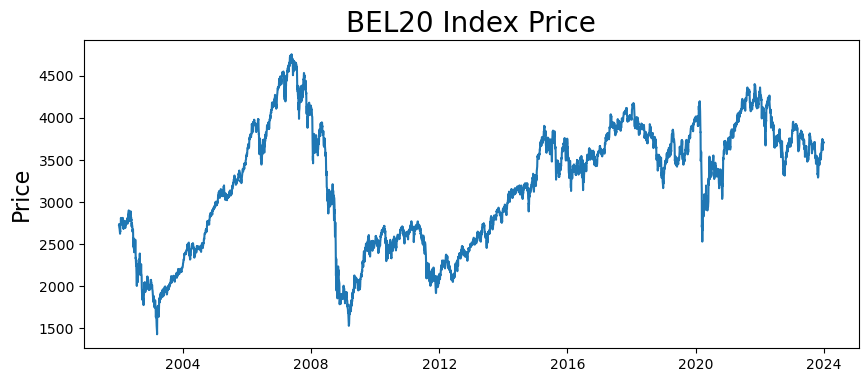

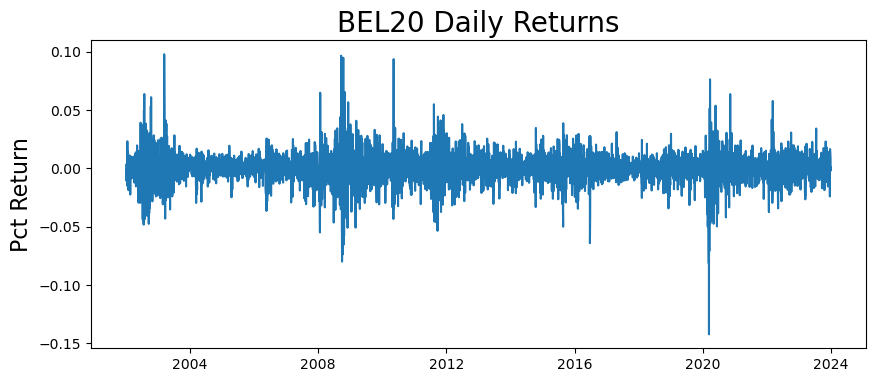

In [6]:
# Download needed data, here Belgium's BEL 20 (^BFX)
# Could be changed for other, like S&P 500 data (ticker ^GSPC)
ticker = "^BFX"
data = yf.download(ticker, start="2002-01-01", end="2024-01-01")

# Calculate daily returns
    # --> Using adjusted price (for dividends, splits...) 
    #no need to account for other changes to estimate return
data['Daily Return'] = data['Adj Close'].pct_change()

plt.figure(figsize=(10,4))
plt.plot(data['Adj Close'])
plt.ylabel('Price', fontsize=16)
plt.title('BEL20 Index Price', fontsize=20)


returns=data['Daily Return']

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BEL20 Daily Returns', fontsize=20)
